In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

np.random.seed(42)
n = 1000
dates = pd.date_range(start='2022-01-01', end='2024-12-31')
product_categories = ['Machinery', 'Tools', 'Electrical', 'Automotive']
regions = ['North', 'South', 'East', 'West']
customer_types = ['Corporate', 'Distributor', 'Retail']
sales_channels = ['Online', 'Offline']

df = pd.DataFrame({
    'Order_ID': np.arange(1001, 1001+n),
    'Date': np.random.choice(dates, n),
    'Product_Category': np.random.choice(product_categories, n),
    'Product_Name': np.random.choice(['Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt',
                                      'Drill', 'Motor', 'Valve', 'Gearbox'], n),
    'Region': np.random.choice(regions, n),
    'Customer_Type': np.random.choice(customer_types, n),
    'Units_Sold': np.random.randint(10, 200, n),
    'Unit_Price': np.random.randint(500, 5000, n),
    'Discount': np.random.uniform(0, 0.25, n),
    'Sales_Channel': np.random.choice(sales_channels, n)
})

df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])
df['Profit'] = df['Total_Sales'] * np.random.uniform(0.10, 0.30, n)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.head()



,Order_ID,Date,Product_Category,Product_Name,Region,Customer_Type,Units_Sold,Unit_Price,Discount,Sales_Channel,Total_Sales,Profit,Year,Month
0,1001,2024-05-10,Tools,Compressor,South,Corporate,141,1760,0.011516,Online,245302.247529,36477.834527,2024,5
1,1002,2024-12-31,Tools,Drill,West,Corporate,102,4432,0.232706,Offline,346865.986341,99318.779554,2024,12
2,1003,2024-11-10,Machinery,Pump,North,Distributor,132,3768,0.165200,Offline,415209.667624,50226.729913,2024,11
3,1004,2022-05-02,Machinery,Valve,West,Corporate,82,1084,0.186591,Offline,72302.323985,11104.809104,2022,5
4,1005,2023-04-12,Machinery,Gearbox,South,Distributor,164,3299,0.077893,Online,498893.118076,101793.613778,2023,4


In [5]:
# Cell 3: Dataset Info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Shape: (1000, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Product_Category  1000 non-null   object        
 3   Product_Name      1000 non-null   object        
 4   Region            1000 non-null   object        
 5   Customer_Type     1000 non-null   object        
 6   Units_Sold        1000 non-null   int64         
 7   Unit_Price        1000 non-null   int64         
 8   Discount          1000 non-null   float64       
 9   Sales_Channel     1000 non-null   object        
 10  Total_Sales       1000 non-null   float64       
 11  Profit            1000 non-null   float64       
 12  Year              1000 non-null   int32         
 13  Month             1000 non-null   int32         
dtype

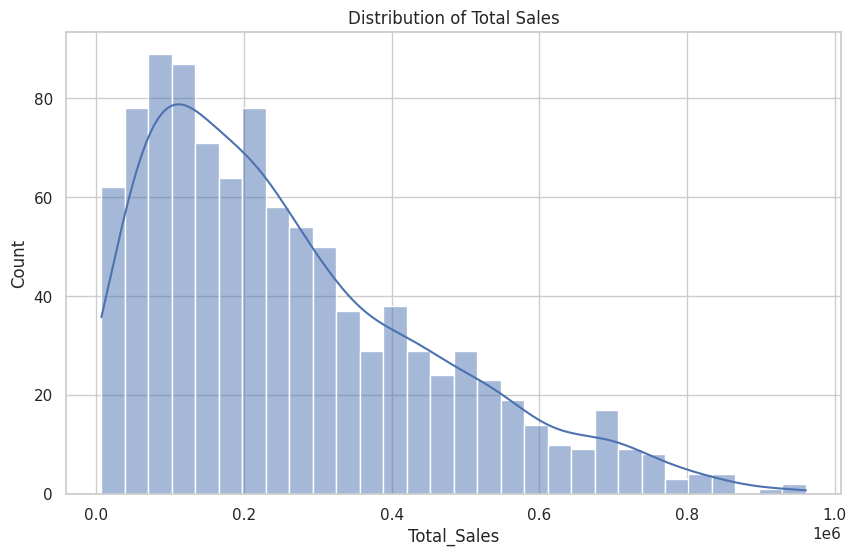

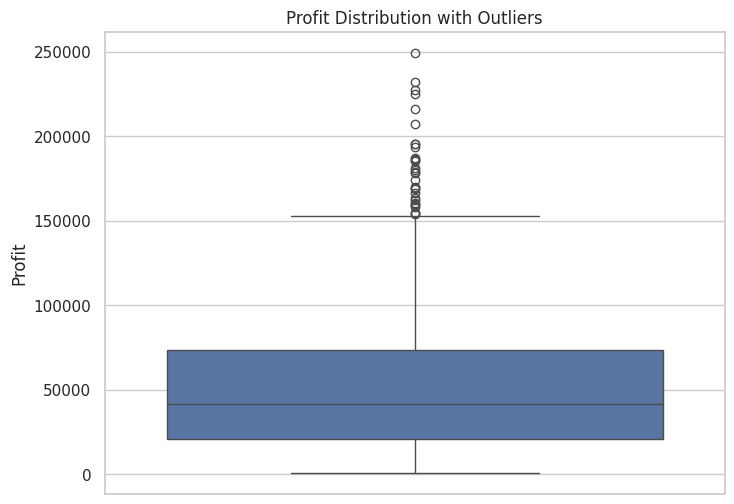

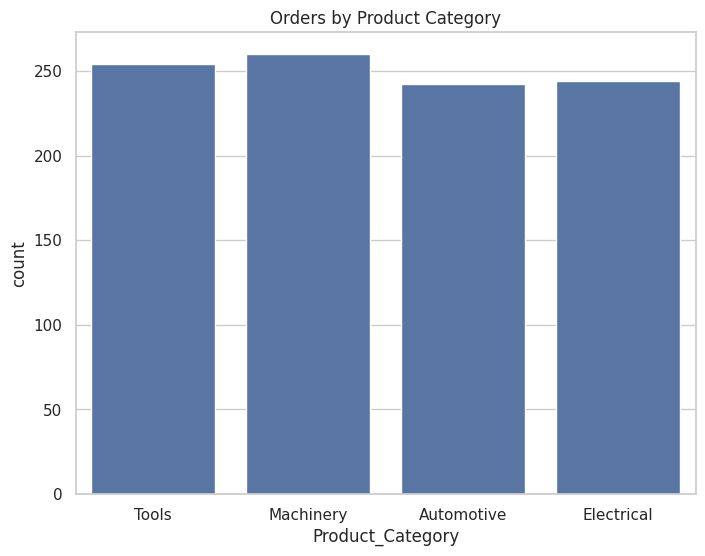

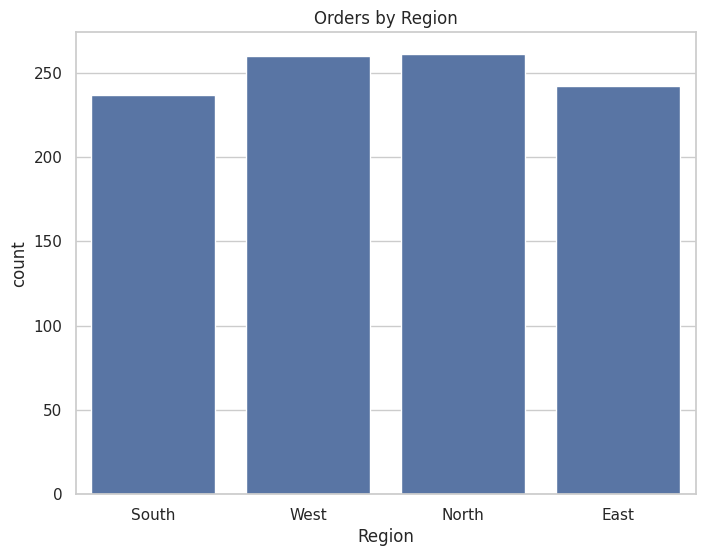

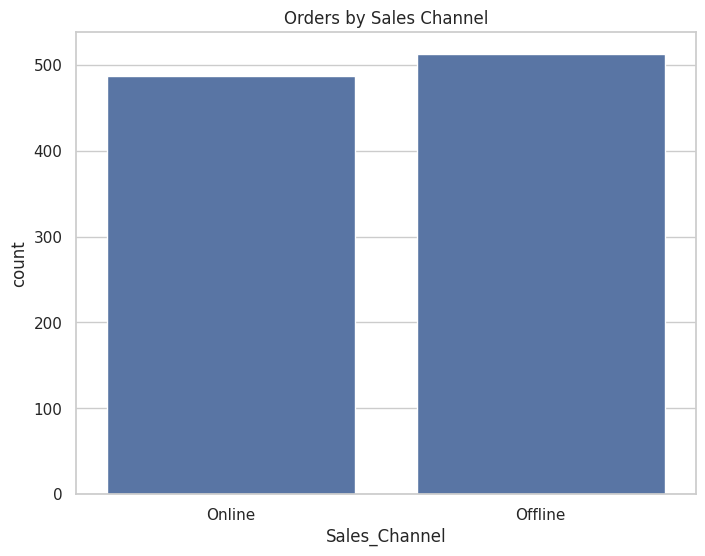

In [6]:
#Univariate Analysis

# Total Sales Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Sales'], bins=30, kde=True)
plt.title("Distribution of Total Sales")
plt.show()

# Profit Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Profit'])
plt.title("Profit Distribution with Outliers")
plt.show()

# Product Category Count
plt.figure(figsize=(8,6))
sns.countplot(x='Product_Category', data=df)
plt.title("Orders by Product Category")
plt.show()

# Region Count
plt.figure(figsize=(8,6))
sns.countplot(x='Region', data=df)
plt.title("Orders by Region")
plt.show()

# Sales Channel Count
plt.figure(figsize=(8,6))
sns.countplot(x='Sales_Channel', data=df)
plt.title("Orders by Sales Channel")
plt.show()


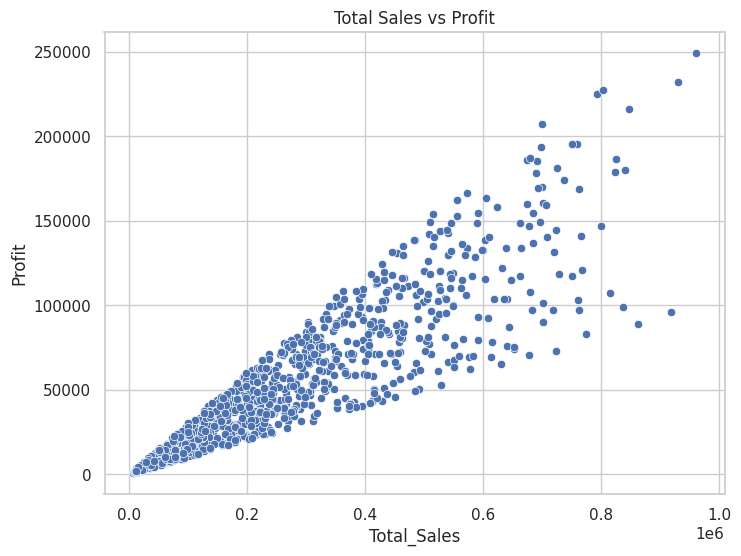

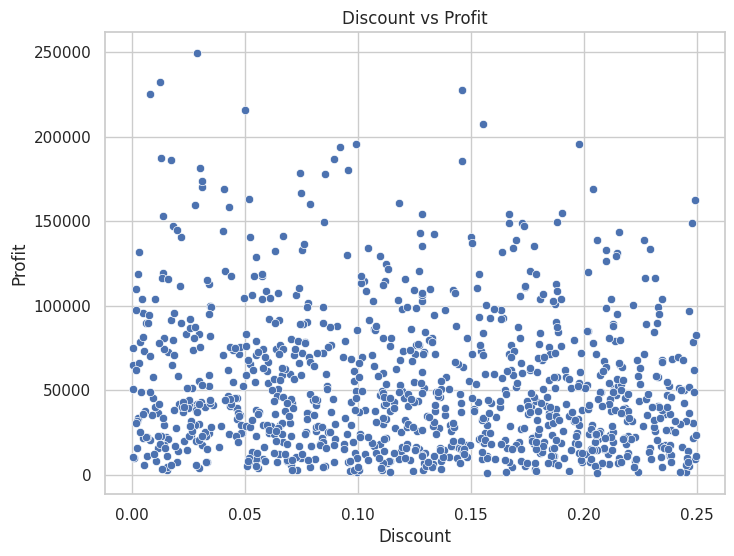

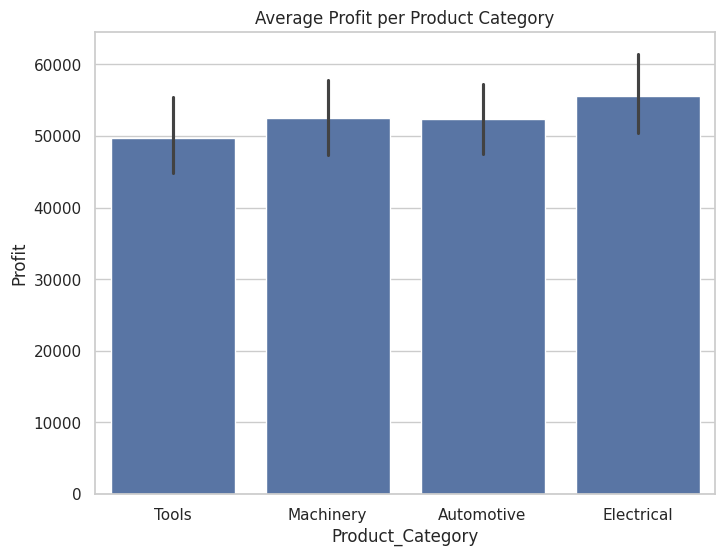

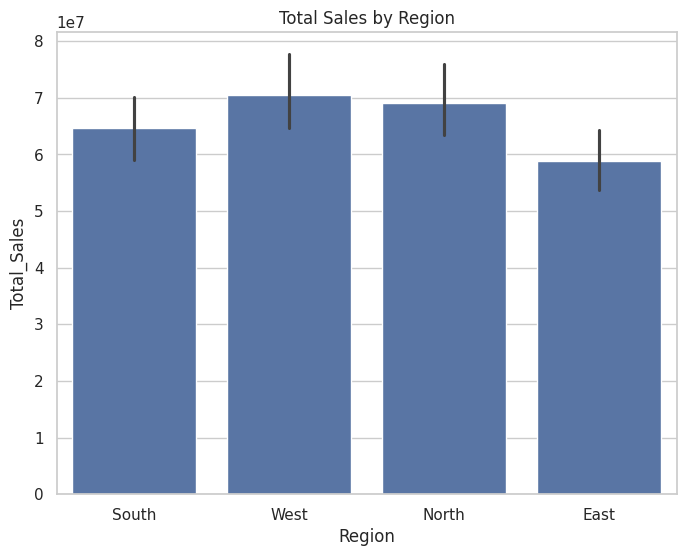

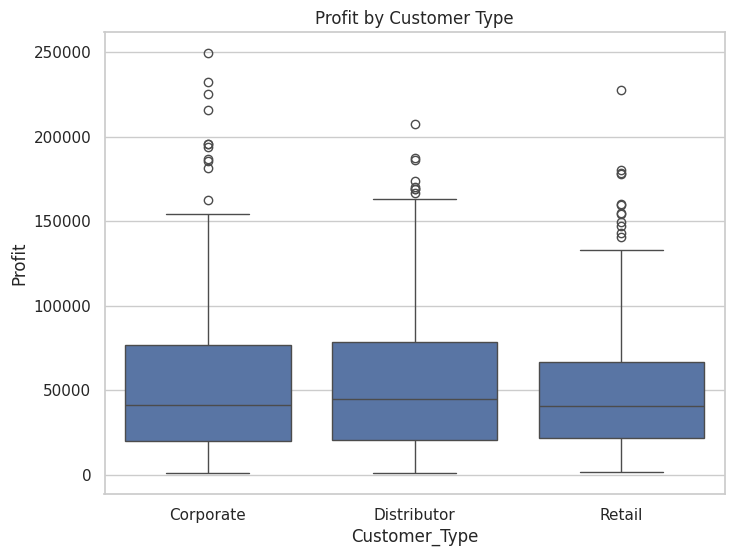

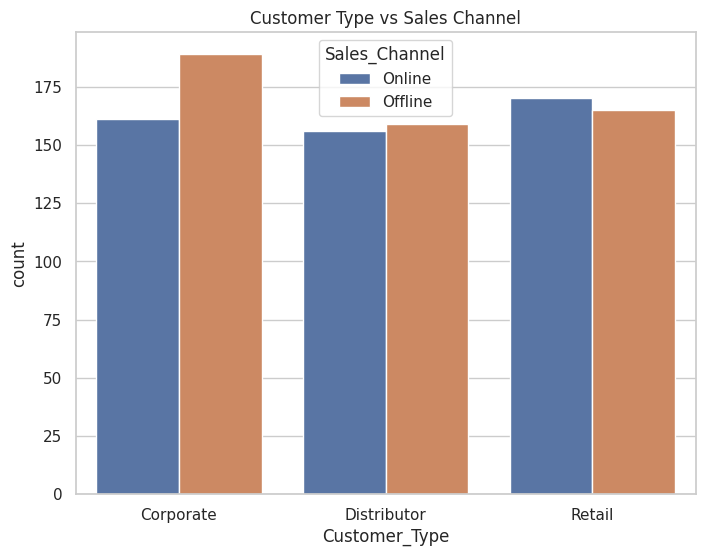

In [7]:
#Bivariate Analysis

# Total Sales vs Profit
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_Sales', y='Profit', data=df)
plt.title("Total Sales vs Profit")
plt.show()

# Discount vs Profit
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()

# Product Category vs Profit
plt.figure(figsize=(8,6))
sns.barplot(x='Product_Category', y='Profit', data=df, estimator=np.mean)
plt.title("Average Profit per Product Category")
plt.show()

# Region vs Total Sales
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Total_Sales', data=df, estimator=np.sum)
plt.title("Total Sales by Region")
plt.show()

# Customer Type vs Profit
plt.figure(figsize=(8,6))
sns.boxplot(x='Customer_Type', y='Profit', data=df)
plt.title("Profit by Customer Type")
plt.show()

# Sales Channel vs Customer Type
plt.figure(figsize=(8,6))
sns.countplot(x='Customer_Type', hue='Sales_Channel', data=df)
plt.title("Customer Type vs Sales Channel")
plt.show()


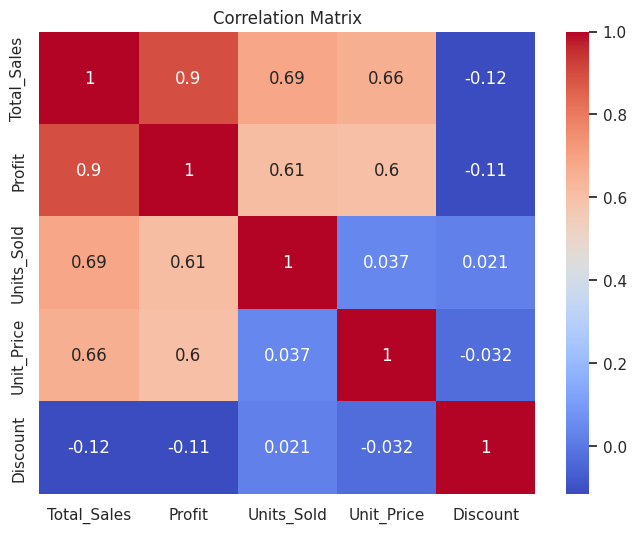

In [8]:
#Correlation Matrix
corr = df[['Total_Sales','Profit','Units_Sold','Unit_Price','Discount']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


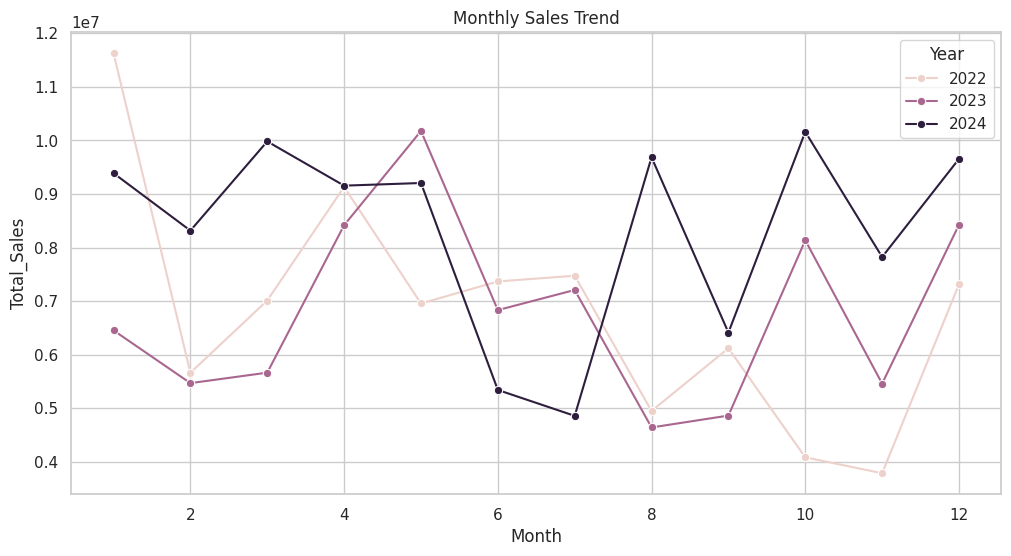

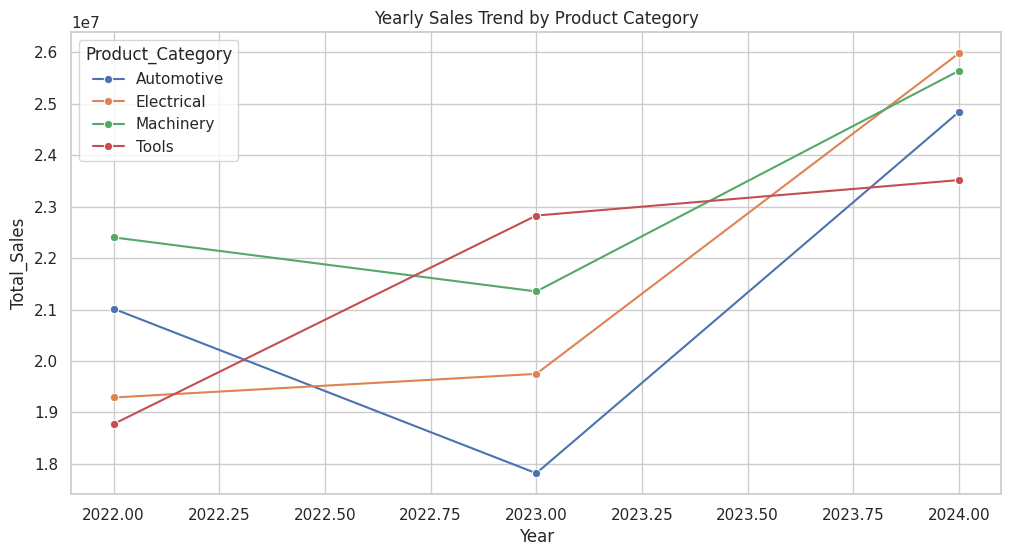

In [9]:
#Trend Analysis

# Monthly Sales Trend
monthly_sales = df.groupby(['Year','Month'])['Total_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Total_Sales', hue='Year', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.show()

# Yearly Sales Trend by Product Category
category_sales = df.groupby(['Year','Product_Category'])['Total_Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Total_Sales', hue='Product_Category', data=category_sales, marker='o')
plt.title("Yearly Sales Trend by Product Category")
plt.show()
